In [221]:
import compute_convergence
import data
import glob
import seaborn as sns
import numpy as np
sns.set_theme()

# Data for experiments

In [216]:
debugdata = data.load_data("../output/synthetic/s1b/")
debugdata = data.postprocess(debugdata)

Filter cases where ratio > 0.95 and save to pickle

In [250]:
dta = debugdata[debugdata.th == 1e-8].copy()

dta['idx095'] = dta.apply(lambda row: np.where(row[[f"ratio_{i}" for i in range(100)]]>0.95)[0], axis=1)
dta['pns095'] = dta.apply(lambda row: row[[f"pns_{i}" for i in row.idx095]].values, axis=1)

dta[['pns095', 'modelFile', ]].to_pickle("pns_kl_1e8_s1b.pickle")

# Understanding bug 1

In [155]:
d2 = data.load_data("../output/synthetic/s1/")
d2 = data.postprocess(d2)
d2.shape

(5074, 434)

In [4]:
d2.to_csv("s1_data.csv")

Collect run IDs that satisfy some constraint. For instance all runs that did converge. Run is intended as single EMCC runs not different network simulations. 

In [102]:
import numpy as np
d2['t500cols'] = d2.apply(lambda row: np.where(row[[f"iter_{i}" for i in range(100)]].values < 500), axis=1)
d2['ll098cols'] = d2.apply(lambda row: np.where(row[[f"ratio_{i}" for i in range(100)]].values > 0.98), axis=1)
d2['ll095cols'] = d2.apply(lambda row: np.where(row[[f"ratio_{i}" for i in range(100)]].values > 0.95), axis=1)
d2['ll05cols'] = d2.apply(lambda row: np.where(row[[f"ratio_{i}" for i in range(100)]].values < 0.5), axis=1)



For a given threshold on KL, collect the min ratio of runs that converged

In [93]:
klth = 0.00001
dd = d2[d2.th == klth]

x = dd.apply(lambda row: np.min(row[[f"ratio_{i}" for i in row.t500cols[0]]]), axis=1)
y = dd.apply(lambda row: np.min(row[[f"ratio_{i}" for i in row.ll098cols[0]]]), axis=1)


<AxesSubplot:>

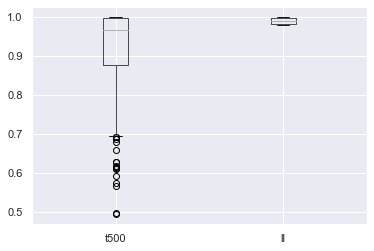

In [94]:
pd.DataFrame({"t500":x, "ll":y}).boxplot()

In [57]:
for i in d2[d2.crit=='kl'].th.unique():
    print(i)
    print(d2[d2.th == i].apply(lambda row: len(row.t500cols[0]), axis=1).mean())a
    print(d2[d2.th == i].apply(lambda row: len(row.ll098cols[0]), axis=1).mean())
    print(d2[d2.th == i].apply(lambda row: len(row.ll095cols[0]), axis=1).mean())

1e-08
67.62928348909658
93.53894080996885
97.26791277258567
0.01
100.0
14.789644012944985
28.948220064724918
1e-07
78.34267912772586
93.47352024922118
97.25545171339564
1e-05
99.87261146496816
85.49363057324841
92.4171974522293
1e-06
92.52996845425868
92.51419558359622
96.29337539432177
0.0001
100.0
67.05448717948718
79.95833333333333
0.001
100.0
39.35598705501618
56.33980582524272
0.0
0.0
93.45820433436532
97.27863777089783


In [5]:
ll1= d2[(d2.crit == "kl") & (d2.th == 0.000001)]
ll1.to_csv("kl_data.csv")

In [30]:
d2.crit.unique()

array(['kl', 'llratio'], dtype=object)

In [34]:
for i in [0.99, 0.99999, 0.999999, 1]:
    dd = d2[(d2.crit == "llratio") & (d2.th == i)]
    ddd = dd[[f"ratio_{j}" for j in range(100)]]
    print(ddd.min(axis=0).mean())

0.8515639036667051
0.8542695058006938
0.8542714769667556
0.8537974780587723


In [33]:
for i in [0.00001, 0.000001, 0.0000001, 0.00000001, 0]:
    dd = d2[(d2.crit == "kl") & (d2.th == i)]
    ddd = dd[[f"ratio_{j}" for j in range(100)]]
    print(ddd.min(axis=0).mean())

0.6760177801503785
0.8269241149407577
0.8514063806707898
0.8537379477942679
0.8537974780587723


In [23]:
sum(ll1.pns_l_emcc == ll1.pns_u_emcc)

24

In [ ]:
ratio > 0.98 

use PNS only for runs where ratio_i is > 0.98 (param)

eps 0.01 0.05 0.1

kl th 0.00001 (1E-5)

boxplot P